## Locally weighted regression
1) Read and Normalise the Dataset

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

(X′WX)inv * X′WY where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

### 1. Loading Data

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [121]:
dfx = pd.read_csv('Locally Weighted Regression/weightedX.csv')
dfy = pd.read_csv('Locally Weighted Regression/weightedY.csv')


In [122]:
X = dfx.values
Y = dfy.values
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


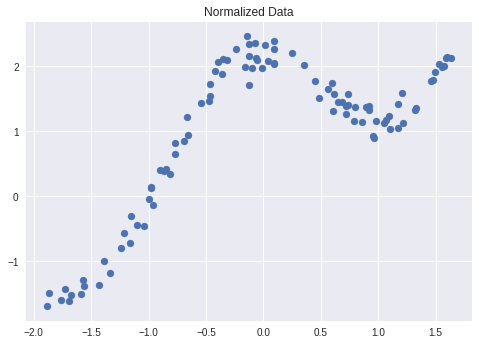

In [123]:
# normalization
plt.style.use("seaborn")
u = X.mean()
std = X.std()
X = (X-u)/std

plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

### 2. Find out W(m*m) diagonal matrix

In [124]:
print(type(np.mat(np.eye(5))))

#a*b --> a,b --> matrices --> Matrix multiplication
#a*b -->? a,b -->arrays --> Element WIse

<class 'numpy.matrix'>


In [125]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M)) # sqare diagonal matrix
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W
        

In [126]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


### 3. Make prediction

In [129]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    # theta = (X'WX)inv*X'WY
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [130]:
theta,pred = predict(X,Y,1.0,1.0)

### 4. Visualise predictions, Analysis

In [147]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    X0 = np.array(X)
    Y0 = np.array(Y)
    
    plt.title("tau/bandwidth param for tau = %.2f"%tau)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,c="red")
    plt.show()

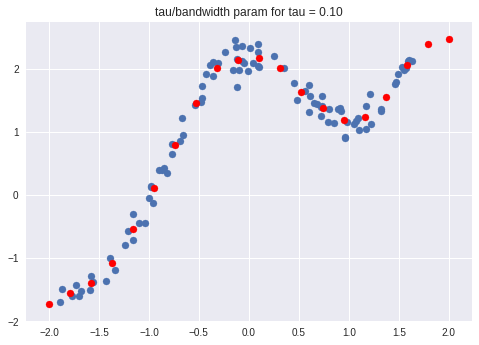

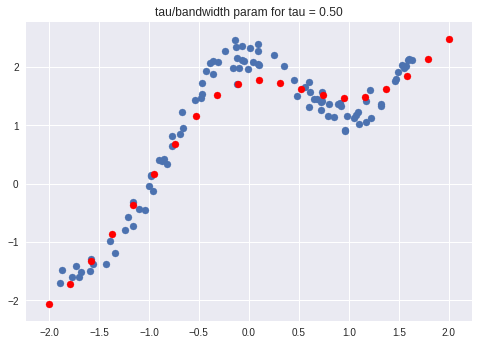

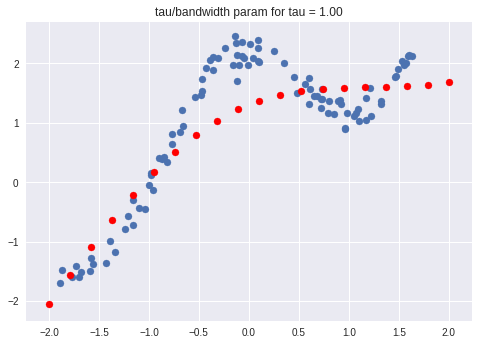

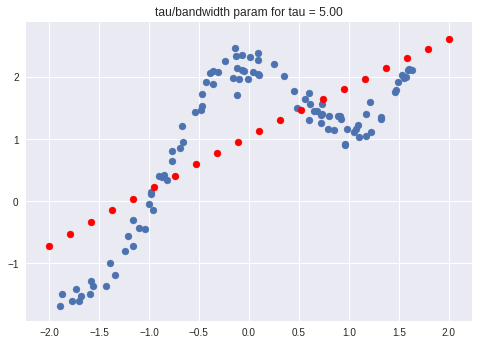

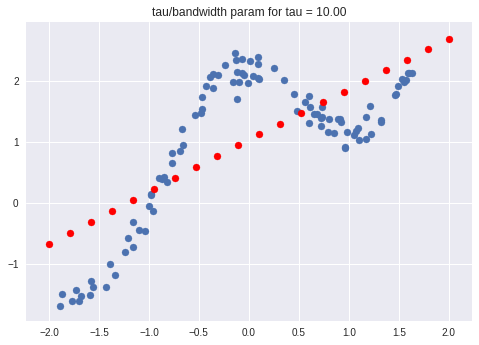

In [148]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)